# Crypto Trading and Analysis (EDA)

## Motivation:

 Crypto Market has coins which are highly volatile in nature. Bitcoin itself was around 5K in 2013 and by the year 2021 it reached to 48 Lakhs which itself shows how volatile the market is. The dataset provides some interesting and valuable insights which help us in gathering some usefull knowledge. Being a data scientist we are very keen to understand such a market who data is not at all stable and keeps on changing frequently and making out new patterns with changing time. These introduction of new patterns with the time makes this problem itself a interesting one and keeps on motivating us to find some valuable information.

## Index:

1. Installing Necessary Libraries
1. Importing Necessary Libraries
1. Importing the Dataset
1. Statistical Description of the Dataset
1. Data Preprocessing

## 1.) Installing Necessary Libraries

In [4]:
!pip install pandas

## 2.) Importing Necessary Libraries

In [5]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# setting matplotlib screen for vsiualizations

plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## 3.) Importing the Dataset

In [7]:
# importing the XRP data
xrp_data = pd.read_csv('coin_XRP.csv')

In [8]:
# looking the last five rows of XRP Coin Data
xrp_data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Adjacent Close
2888,2889,XRP,XRP,02-07-2021 23:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10,0.656763
2889,2890,XRP,XRP,03-07-2021 23:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10,0.672888
2890,2891,XRP,XRP,04-07-2021 23:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10,0.694945
2891,2892,XRP,XRP,05-07-2021 23:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10,0.654300
2892,2893,XRP,XRP,06-07-2021 23:59,0.679923,0.652676,0.653055,0.665402,1.938959e+09,3.072284e+10,0.665402


In [9]:
# importing the Bitcoin Data
btc_data = pd.read_csv('coin_Bitcoin.csv')

In [10]:
# looking the last five rows of Bitcoin Coin Data
btc_data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Adjacent Close
2986,2987,Bitcoin,BTC,02-07-2021 23:59,33939.58870,32770.68078,33549.60018,33897.04859,3.872897e+10,6.354510e+11,33897.04859
2987,2988,Bitcoin,BTC,03-07-2021 23:59,34909.25990,33402.69654,33854.42136,34668.54840,2.438396e+10,6.499400e+11,34668.54840
2988,2989,Bitcoin,BTC,04-07-2021 23:59,35937.56715,34396.47746,34665.56487,35287.77977,2.492431e+10,6.615750e+11,35287.77977
2989,2990,Bitcoin,BTC,05-07-2021 23:59,35284.34443,33213.66103,35284.34443,33746.00246,2.672155e+10,6.326960e+11,33746.00246
2990,2991,Bitcoin,BTC,06-07-2021 23:59,35038.53636,33599.91617,33723.50966,34235.19345,2.650126e+10,6.418990e+11,34235.19345


## 4.) Statistical Description of the Dataset

In [11]:
xrp_data.shape, xrp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNo             2893 non-null   int64  
 1   Name            2893 non-null   object 
 2   Symbol          2893 non-null   object 
 3   Date            2893 non-null   object 
 4   High            2893 non-null   float64
 5   Low             2893 non-null   float64
 6   Open            2893 non-null   float64
 7   Close           2893 non-null   float64
 8   Volume          2893 non-null   float64
 9   Marketcap       2893 non-null   float64
 10  Adjacent Close  2893 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 248.7+ KB


((2893, 11), None)

In [12]:
xrp_data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap,Adjacent Close
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2.893000e+03,2.893000e+03,2893.000000
mean,1447.000000,0.246591,0.222000,0.234548,0.234790,1.260299e+09,9.678506e+09,0.234790
std,835.281489,0.365393,0.311581,0.338544,0.338629,3.137958e+09,1.385907e+10,0.338629
min,1.000000,0.003082,0.002802,0.002809,0.002810,0.000000e+00,2.196991e+07,0.002810
25%,724.000000,0.007531,0.007093,0.007332,0.007346,4.780950e+05,2.263168e+08,0.007346
50%,1447.000000,0.189184,0.176196,0.181968,0.182608,1.119370e+08,7.523251e+09,0.182608
75%,2170.000000,0.320751,0.303941,0.312021,0.312465,1.238721e+09,1.306444e+10,0.312465
max,2893.000000,3.841940,3.117340,3.363570,3.377810,3.695518e+10,1.308530e+11,3.377810


In [13]:
btc_data.shape, btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNo             2991 non-null   int64  
 1   Name            2991 non-null   object 
 2   Symbol          2991 non-null   object 
 3   Date            2991 non-null   object 
 4   High            2991 non-null   float64
 5   Low             2991 non-null   float64
 6   Open            2991 non-null   float64
 7   Close           2991 non-null   float64
 8   Volume          2991 non-null   float64
 9   Marketcap       2991 non-null   float64
 10  Adjacent Close  2991 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 257.2+ KB


((2991, 11), None)

In [14]:
btc_data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap,Adjacent Close
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03,2991.000000
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11,6711.290443
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11,11298.141921
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08,68.431000
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09,430.569489
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10,2286.409912
75%,2243.500000,8733.926948,8289.800460,8569.656493,8576.238715,1.592015e+10,1.499960e+11,8576.238715
max,2991.000000,64863.098910,62208.964370,63523.754870,63503.457930,3.509680e+11,1.186360e+12,63503.457930


### So, from here we can observe that from the year 2013 to 2021.

### BTC attained a minimum value of 65.526001 USD which in INR is approximately Rs 5000

### BTC attained a maximum value of 62208.964370 USD which is INR is approximately Rs 48,00,000

## 5.) Data Preprocessing

### For data preprocessing we will we doing the following:
1. Data Cleaning
1. Data Reduction

### a.) Data Cleaning

Cleaning the data by finding all the NA values and filling it

We will try interpolating the dataset

Interpolating : Taking the average value to the above and below valid value. Meaning to say that trying to fit in between the above and the below
valid value.


In [15]:
xrp_data = xrp_data.interpolate()

xrp_data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Adjacent Close
2888,2889,XRP,XRP,02-07-2021 23:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10,0.656763
2889,2890,XRP,XRP,03-07-2021 23:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10,0.672888
2890,2891,XRP,XRP,04-07-2021 23:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10,0.694945
2891,2892,XRP,XRP,05-07-2021 23:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10,0.654300
2892,2893,XRP,XRP,06-07-2021 23:59,0.679923,0.652676,0.653055,0.665402,1.938959e+09,3.072284e+10,0.665402


In [16]:
btc_data = btc_data.interpolate()

btc_data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Adjacent Close
2986,2987,Bitcoin,BTC,02-07-2021 23:59,33939.58870,32770.68078,33549.60018,33897.04859,3.872897e+10,6.354510e+11,33897.04859
2987,2988,Bitcoin,BTC,03-07-2021 23:59,34909.25990,33402.69654,33854.42136,34668.54840,2.438396e+10,6.499400e+11,34668.54840
2988,2989,Bitcoin,BTC,04-07-2021 23:59,35937.56715,34396.47746,34665.56487,35287.77977,2.492431e+10,6.615750e+11,35287.77977
2989,2990,Bitcoin,BTC,05-07-2021 23:59,35284.34443,33213.66103,35284.34443,33746.00246,2.672155e+10,6.326960e+11,33746.00246
2990,2991,Bitcoin,BTC,06-07-2021 23:59,35038.53636,33599.91617,33723.50966,34235.19345,2.650126e+10,6.418990e+11,34235.19345


## (b) Data Reduction

#### So, we wlll dropping few attributes which are redudant or have similarity with other attributes. In order to do so we will use Pearson Correlation Coeffecient between two columns.

#### On Observing the above dataset, the Close and Adjacent Close appears to be the same.

#### So, to ensure that the above mentioned attributes are the same we will use correlation analysis

In [17]:
corr, _ = pearsonr(xrp_data['Close'], xrp_data['Adjacent Close'])
corr = round(corr, 3)
corr

1.0

In [18]:
corr, _ = pearsonr(btc_data['Close'], btc_data['Adjacent Close'])
corr = round(corr, 3)
corr

1.0

### So, from above we can see that both Close and Adjacent Close are exactly same attributes as their r value is exactly 1. Sowe will drop Adjacent Close from both XRP and BTC

In [19]:
xrp_data.drop(['Adjacent Close'], axis = 1, inplace=True)

xrp_data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2888,2889,XRP,XRP,02-07-2021 23:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
2889,2890,XRP,XRP,03-07-2021 23:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
2890,2891,XRP,XRP,04-07-2021 23:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
2891,2892,XRP,XRP,05-07-2021 23:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10
2892,2893,XRP,XRP,06-07-2021 23:59,0.679923,0.652676,0.653055,0.665402,1.938959e+09,3.072284e+10


In [20]:
btc_data.drop(['Adjacent Close'], axis = 1, inplace=True)
btc_data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2986,2987,Bitcoin,BTC,02-07-2021 23:59,33939.58870,32770.68078,33549.60018,33897.04859,3.872897e+10,6.354510e+11
2987,2988,Bitcoin,BTC,03-07-2021 23:59,34909.25990,33402.69654,33854.42136,34668.54840,2.438396e+10,6.499400e+11
2988,2989,Bitcoin,BTC,04-07-2021 23:59,35937.56715,34396.47746,34665.56487,35287.77977,2.492431e+10,6.615750e+11
2989,2990,Bitcoin,BTC,05-07-2021 23:59,35284.34443,33213.66103,35284.34443,33746.00246,2.672155e+10,6.326960e+11
2990,2991,Bitcoin,BTC,06-07-2021 23:59,35038.53636,33599.91617,33723.50966,34235.19345,2.650126e+10,6.418990e+11


## 6.) Finding patterns in the Dataset

### (a) Plotting the Historical Return for BTC

In [21]:
#Creating a historical return column for BTC

btc_data['Return'] = btc_data['Close'].pct_change()

In [22]:
btc_data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Return
2986,2987,Bitcoin,BTC,02-07-2021 23:59,33939.58870,32770.68078,33549.60018,33897.04859,3.872897e+10,6.354510e+11,0.009679
2987,2988,Bitcoin,BTC,03-07-2021 23:59,34909.25990,33402.69654,33854.42136,34668.54840,2.438396e+10,6.499400e+11,0.022760
2988,2989,Bitcoin,BTC,04-07-2021 23:59,35937.56715,34396.47746,34665.56487,35287.77977,2.492431e+10,6.615750e+11,0.017861
2989,2990,Bitcoin,BTC,05-07-2021 23:59,35284.34443,33213.66103,35284.34443,33746.00246,2.672155e+10,6.326960e+11,-0.043692
2990,2991,Bitcoin,BTC,06-07-2021 23:59,35038.53636,33599.91617,33723.50966,34235.19345,2.650126e+10,6.418990e+11,0.014496


In [23]:
#viewing the average return from BTC
np.mean(btc_data['Return'])

0.0027406195412198893

<AxesSubplot:>

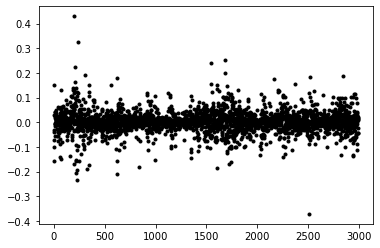

In [24]:
btc_data['Return'].plot(style='k.')

### (b) Plotting the Historical Return for XRP

In [25]:
#Creating a historical return column for XRP

xrp_data['Return'] = xrp_data['Close'].pct_change()
xrp_data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Return
2888,2889,XRP,XRP,02-07-2021 23:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10,-0.006681
2889,2890,XRP,XRP,03-07-2021 23:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10,0.024553
2890,2891,XRP,XRP,04-07-2021 23:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10,0.032780
2891,2892,XRP,XRP,05-07-2021 23:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10,-0.058487
2892,2893,XRP,XRP,06-07-2021 23:59,0.679923,0.652676,0.653055,0.665402,1.938959e+09,3.072284e+10,0.016968


In [26]:
#viewing the average return from XRP
np.mean(xrp_data['Return'])

0.004478285900740008

<AxesSubplot:>

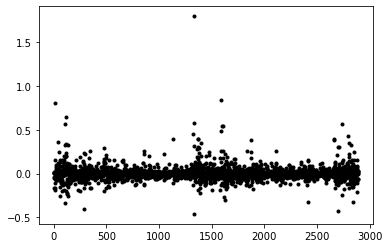

In [27]:
xrp_data['Return'].plot(style="k.")

### (c) Plotting the Closing Price Series for BTC

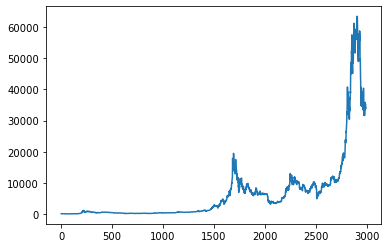

In [28]:
pl1 = btc_data['Close'].plot(style=['-'])

In [ ]:
(d) Plotting the closing price series for XRP

In [ ]:
pl2 = xrp_data['Close'].plot(style = ['-'])

## 7. Plotting the predicted and actual value
Single Exponential Smoothing, SES for short, is a time series forecasting method for univariate data without a trend or seasonality. It requires a single parameter, called alpha
(a), also called the smoothing factor or smoothing coefficient.
We will be using SES for forecasting the closing values of the crypto currencies

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

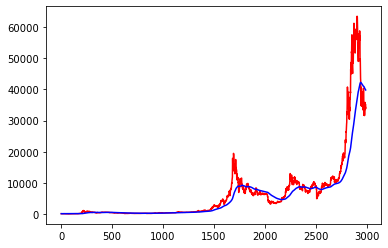

In [29]:
# Plotting the Pedicted and actual value for Bitcoin

from statsmodels.tsa.holtwinters import SimpleExpSmoothing


model = SimpleExpSmoothing(btc_data['Close']).fit(smoothing_level=.01, optimized=False)
btc_data['Close'].plot(style = ['-'], color = 'red')
model.fittedvalues.plot(style = ['-'], color = 'blue')

#### In the above figure, the red line shows the actual price while the blue line shows the predicted line.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

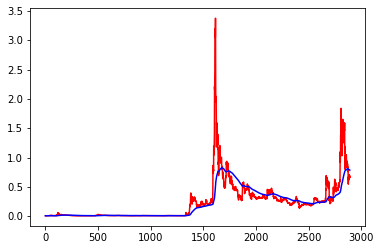

In [30]:
# Plotting the Pedicted and actual value for XRP

from statsmodels.tsa.holtwinters import SimpleExpSmoothing


model = SimpleExpSmoothing(xrp_data['Close']).fit(smoothing_level=.01, optimized=False)

xrp_data['Close'].plot(style = ['-'], color = 'red')
model.fittedvalues.plot(style = ['-'], color = 'blue')

#### In the above figure, the red line shows the actual price while the blue line shows the predicted line.

## 8. Finding relationship between BTC and XRP Returns using Linear Regression

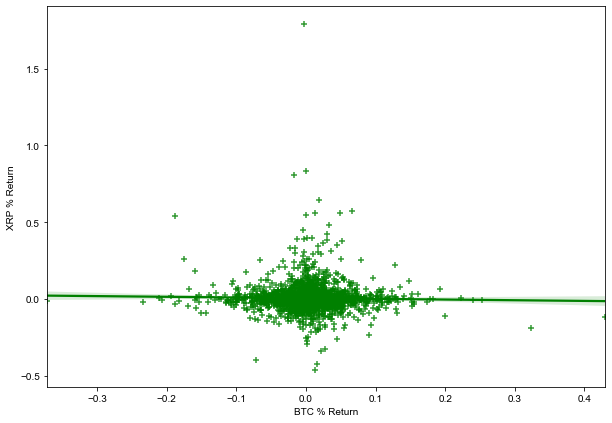

In [31]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,7))

btc_return = btc_data['Close'].pct_change().dropna()
xrp_return = xrp_data['Close'].pct_change().dropna()

regplot = sns.regplot(x=btc_return[:2800], y=xrp_return[:2800], color = 'g', marker = '+')
regplot.set(xlabel = 'BTC % Return', ylabel = 'XRP % Return')
sns.set_style("whitegrid")

### So, from the above we can see that both XRP and BTC returns are highly correlated.
